## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Sampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Testing
from scipy.stats import pearsonr

#Metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

import pickle

## Defining Functions for Accuracy Metrics & Modelling

In [2]:
def acc_metrics(actual_values,predicted_values):
    roc_auc=round(roc_auc_score(actual_values,predicted_values),2)
    precision=round(precision_score(actual_values,predicted_values),2)
    recall = round(recall_score(actual_values,predicted_values),2)
        
    print('\nROC_AUC Score: ',roc_auc)
    print('Precision Score: ',precision)
    print('Recall Score: ',recall,'\n')
    
    return roc_auc,precision,recall

In [3]:
def modelling(x_train, x_test, y_train, y_test):
    
    print('\nLogistic Regression Modelling')
    LR_model=LogisticRegression(solver='liblinear')
    LR_model.fit(x_train,y_train)
    acc_metrics(y_test,LR_model.predict(x_test))
    
    print('\nDecision Tree Classifier Modelling')
    DT_model=DecisionTreeClassifier(criterion='entropy')
    DT_model.fit(x_train,y_train)
    acc_metrics(y_test,DT_model.predict(x_test))
    
    print('\nRandom Forest Classifier Modelling')
    RF_model=RandomForestClassifier(n_estimators = 10)
    RF_model.fit(x_train,y_train)
    acc_metrics(y_test,RF_model.predict(x_test))
    
    print('\nNaive Bayes Modelling')
    NB_model=GaussianNB()
    NB_model.fit(x_train,y_train)
    acc_metrics(y_test,NB_model.predict(x_test))
    
    return LR_model,RF_model, DT_model, NB_model

## Importing Datasets

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [5]:
print('Train Data Shape: ',train_data.shape,'\ntest Data Shape: ',test_data.shape)

Train Data Shape:  (200000, 202) 
test Data Shape:  (200000, 201)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [8]:
train_data.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [9]:
test_data.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

###### Observations :  
Train & Test Data both contains 200000 rows, 200 feature columns [ var_0,var_1,...,var_199],       one 'ID_code' column.Train data has 'target' variable as label 

######   

## Data Pre-Processing

In [10]:
# Dropping the string column ‘ID_code’, as this feature only represents the index of the observations
# in the given dataset & have no impact in prediction of the target variable.

train_data.drop(columns='ID_code',inplace=True)

In [11]:
#shape of train data

train_data.shape

(200000, 201)

######   

## Exploratory Data Analysis

### 1. Missing Value Check

In [12]:
# Training Data
train_data.isna().sum().sum()

0

In [13]:
#Testing Data
test_data.isna().sum().sum()

0

###### Observations : 
No missing values in Train or Test Data

######   

### 2. Target Class Distribution 

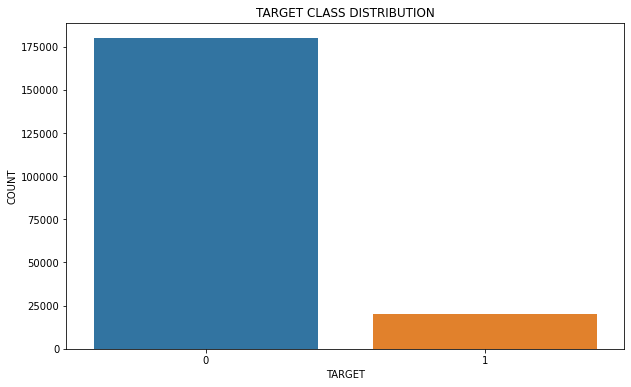

In [14]:
#sns.barplot(x=train_data['target'].unique(),y=train_data['target'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x ='target', data = train_data) 
plt.title('TARGET CLASS DISTRIBUTION')
plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.show()

In [15]:
train_data.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [16]:
per=train_data.target.value_counts()
print('Percentage of class 0: ',round(per[0]/(per[0]+per[1]),2)*100,'%')
print('Percentage of class 1: ',round(per[1]/(per[0]+per[1]),2)*100,'%')

Percentage of class 0:  90.0 %
Percentage of class 1:  10.0 %


###### Observations : 
The above distribution shows that the dataset is an imbalanced Dataset & have majority of class 0 i.e. 90% of data is for class 0. 

######   

### 3. Data Description

In [17]:
train_data.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

###### Observations : 
Mean of some variables are very high & difference between mean and max for some variables is quite high too. Which shows the presence of outliers in the dataset.

######   

### 4. Outlier Analysis

In [18]:
#Detect and replace outliers with mean
for i in train_data.drop(columns='target').columns:
    
    q75, q25 = np.percentile(train_data.loc[:,i], [75 ,25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
        
    train_data[i][train_data[i] < minimum]= np.nan
    train_data[i][train_data[i] > maximum]= np.nan
    print(i)
    print('Max out bound: ',maximum)
    print('Min out bound: ',minimum)
    print('Total No. of Outliers: ',train_data[i].isna().sum())
    train_data[i].fillna(train_data[i].mean(),inplace=True)
    
    

D:\Program_Files\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Program_Files\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


var_0
Max out bound:  19.214725
Min out bound:  1.9973250000000018
Total No. of Outliers:  104
var_1
Max out bound:  10.5066
Min out bound:  -13.888000000000002
Total No. of Outliers:  6
var_2
Max out bound:  18.208037500000003
Min out bound:  3.031137499999998
Total No. of Outliers:  49
var_3
Max out bound:  12.9291375
Min out bound:  0.6490375000000013
Total No. of Outliers:  22
var_4
Max out bound:  15.828050000000005
Min out bound:  6.316249999999997
Total No. of Outliers:  76
var_5
Max out bound:  19.112525
Min out bound:  -29.388075
Total No. of Outliers:  4
var_6
Max out bound:  7.855949999999998
Min out bound:  2.91475
Total No. of Outliers:  113
var_7
Max out bound:  26.841550000000005
Min out bound:  6.205149999999996
Total No. of Outliers:  19
var_8
Max out bound:  10.821449999999999
Min out bound:  -10.20135
Total No. of Outliers:  2
var_9
Max out bound:  11.532862499999998
Min out bound:  3.6703625000000013
Total No. of Outliers:  0
var_10
Max out bound:  16.34973750000000

Total No. of Outliers:  8
var_98
Max out bound:  3.7507374999999996
Min out bound:  -0.2221624999999996
Total No. of Outliers:  172
var_99
Max out bound:  4.480549999999999
Min out bound:  -6.058249999999999
Total No. of Outliers:  85
var_100
Max out bound:  20.128300000000003
Min out bound:  -33.194900000000004
Total No. of Outliers:  176
var_101
Max out bound:  28.665862500000003
Min out bound:  -1.7758375000000033
Total No. of Outliers:  0
var_102
Max out bound:  47.63360000000001
Min out bound:  -2.9034000000000084
Total No. of Outliers:  92
var_103
Max out bound:  2.1201499999999998
Min out bound:  1.01415
Total No. of Outliers:  37
var_104
Max out bound:  17.108400000000003
Min out bound:  5.891599999999997
Total No. of Outliers:  325
var_105
Max out bound:  6.596099999999999
Min out bound:  1.865700000000001
Total No. of Outliers:  572
var_106
Max out bound:  13.898800000000001
Min out bound:  3.3124
Total No. of Outliers:  397
var_107
Max out bound:  40.1193875
Min out bound:  

Total No. of Outliers:  0
var_197
Max out bound:  11.604049999999997
Min out bound:  6.2420500000000025
Total No. of Outliers:  51
var_198
Max out bound:  24.417262499999996
Min out bound:  7.477162500000003
Total No. of Outliers:  94
var_199
Max out bound:  28.9047125
Min out bound:  -35.2763875
Total No. of Outliers:  20


###### Observations : 
Total outliers found in train data is 26536. These Outliers are then replaced by the column’s mean value.

######   

### 5. Numerical Data Distribution

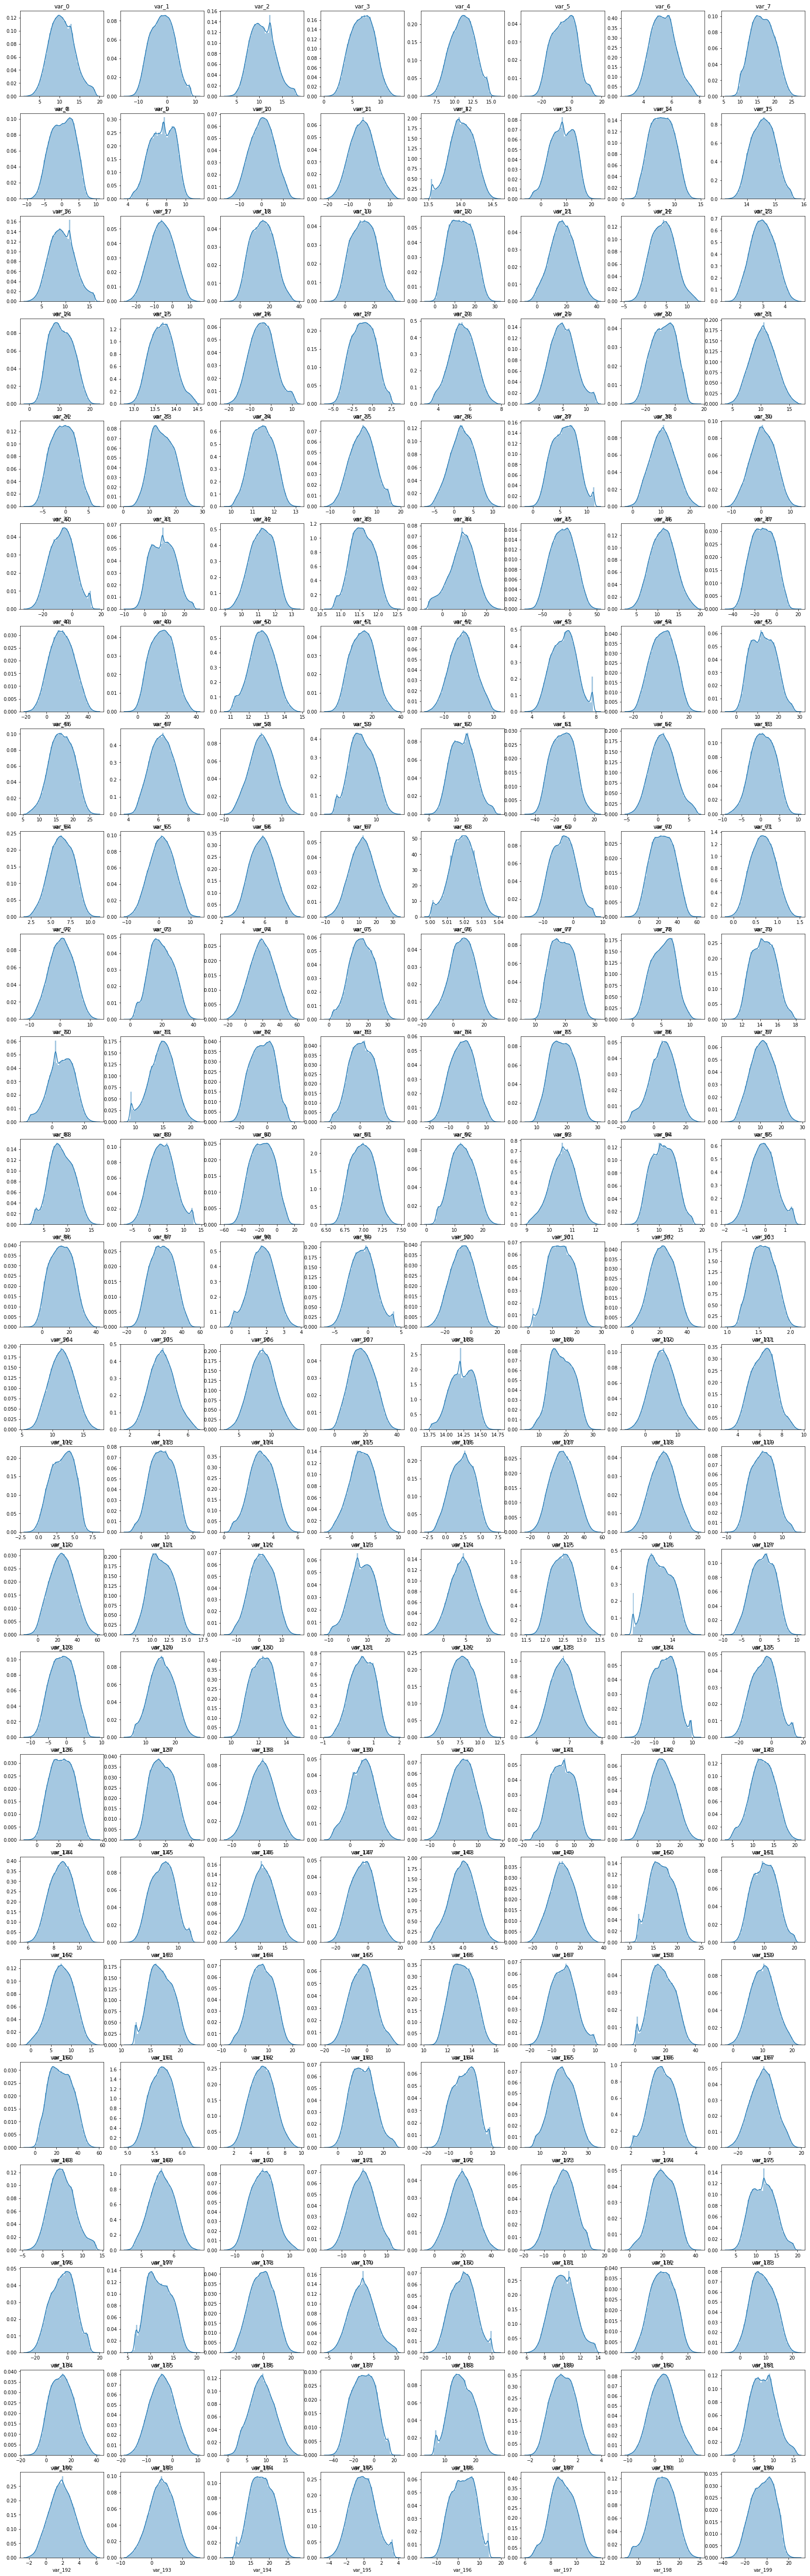

In [19]:
plt.figure(figsize=(30,100))
for i,col in enumerate(train_data.drop(columns='target').columns):
    plt.subplot(25,8,i+1)
    sns.distplot(train_data[col])
    plt.title(col)
plt.show()    

###### Observations :
All the features in Dataset, pretty much follows normalised distribution.


######   

### 6. Numerical Data Distribution per target Class

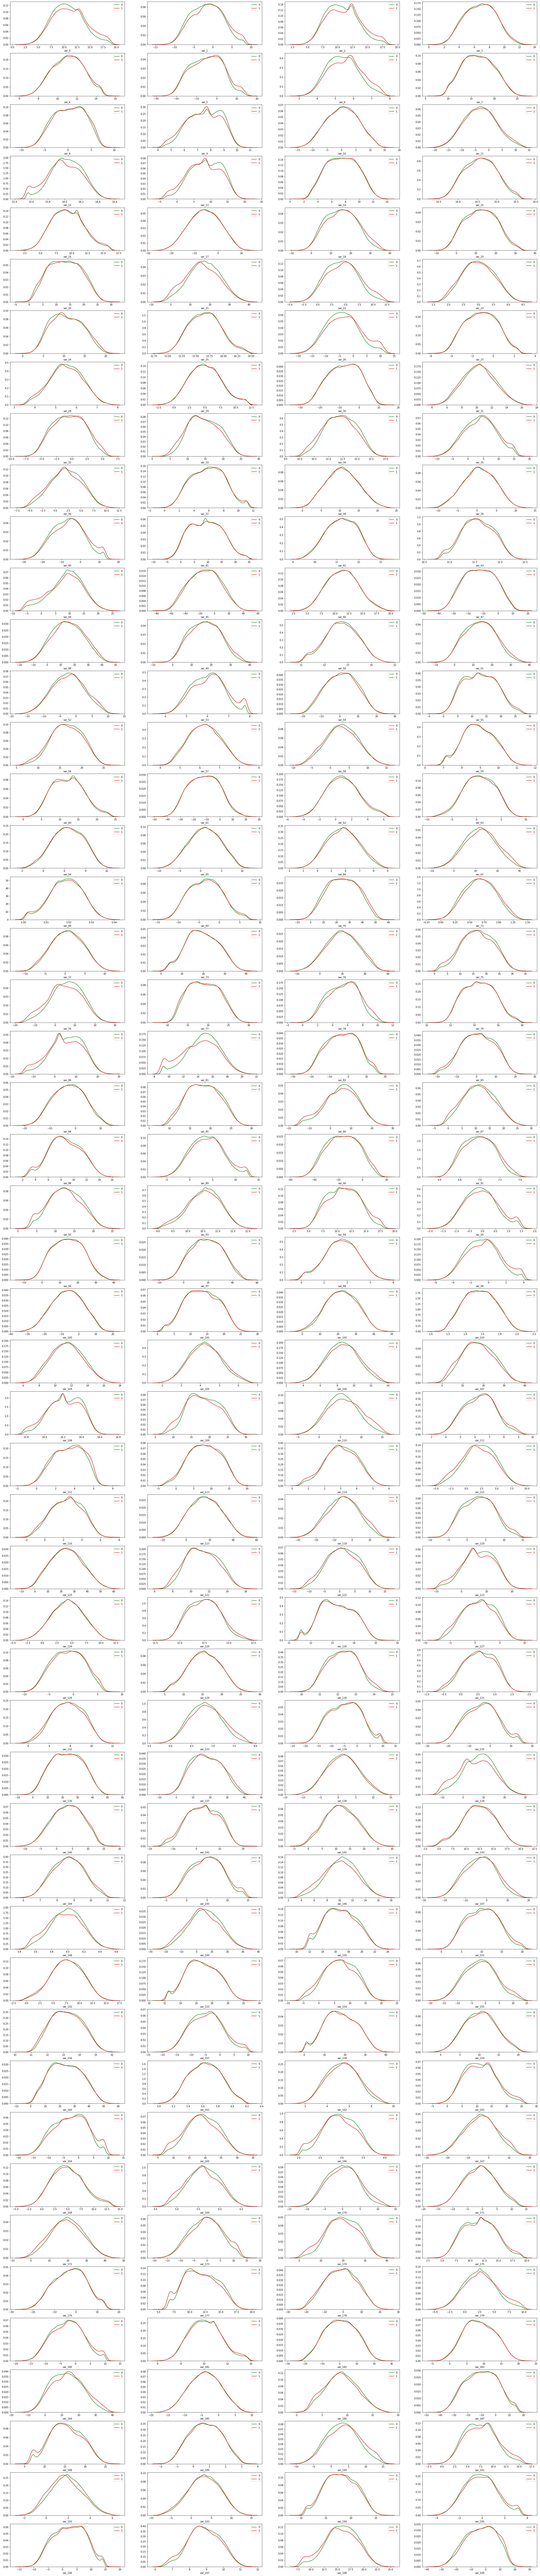

In [20]:
plt.figure(figsize=(40,200))
for i,col in enumerate(train_data.drop(columns='target').columns):
    plt.subplot(50,4,i+1)
    sns.distplot(train_data[train_data['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train_data[train_data['target']==1][col],hist=False,label='1',color='red')

###### Observations :
Numerical columns almost follows same distribution for both classes.

######   

### 7. Distribution of Mean, Median & Standard Deviation

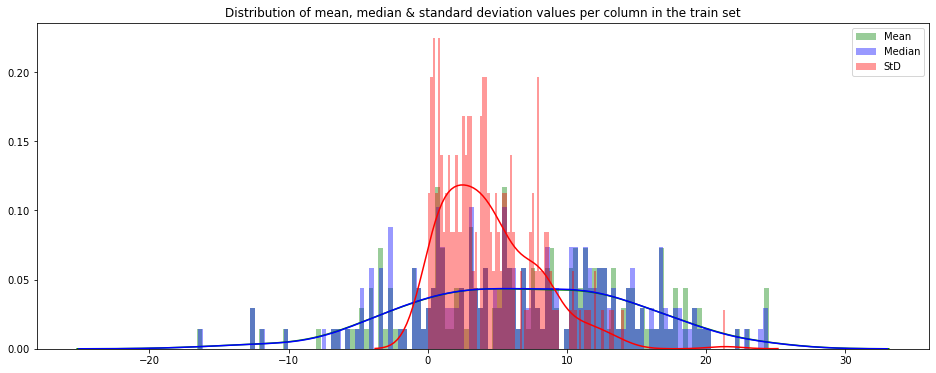

In [21]:
plt.figure(figsize=(16,6))
features=train_data.drop(columns='target').columns
plt.title("Distribution of mean, median & standard deviation values per column in the train set")

sns.distplot(train_data[features].mean(axis=0),color="green", kde=True,bins=120, label='Mean')
sns.distplot(train_data[features].median(axis=0),color="blue", kde=True,bins=120, label='Median')
sns.distplot(train_data[features].std(axis=0),color="red", kde=True,bins=120, label='StD')
plt.legend()
plt.show()

###### Observations:
Mean values are distributed over a large range.

Moreover mean and median have similar distribution.

Standard deviation is relatively large.



######   

### 8. Distribution of Skew values per column

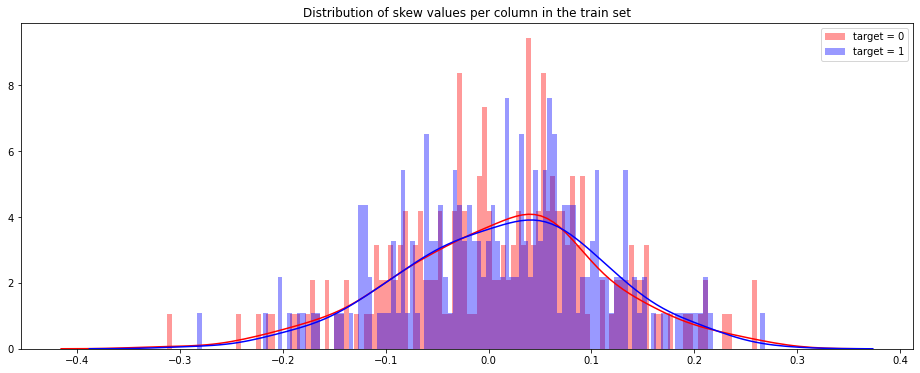

In [22]:
t0 = train_data.loc[train_data['target'] == 0]
t1 = train_data.loc[train_data['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of skew values per column in the train set")
sns.distplot(t0[features].skew(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].skew(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

######   

### 9. Distribution of Kurtosis values per column

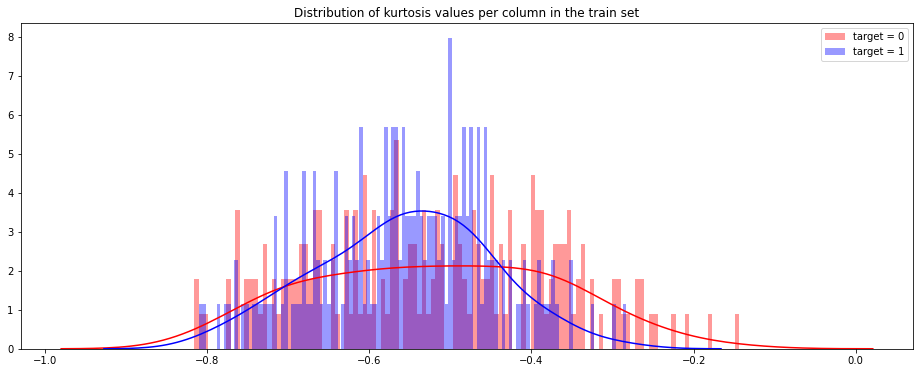

In [23]:
t0 = train_data.loc[train_data['target'] == 0]
t1 = train_data.loc[train_data['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis values per column in the train set")
sns.distplot(t0[features].kurtosis(axis=0),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].kurtosis(axis=0),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

######   

### 10. Feature Correlation with each other

In [24]:
col=['var_'+str(i) for i in range(0,200)]
corr=train_data.loc[:,col].corr()
d=pd.DataFrame(corr.abs().unstack().sort_values().reset_index())
d=d[d.level_0!=d.level_1]
d

level_0  level_1             0
0       var_61  var_125  3.420113e-08
1      var_125   var_61  3.420113e-08
2      var_114  var_172  5.401101e-08
3      var_172  var_114  5.401101e-08
4       var_46  var_109  1.139129e-07
...        ...      ...           ...
39795   var_53  var_148  9.590880e-03
39796  var_139   var_26  9.778775e-03
39797   var_26  var_139  9.778775e-03
39798   var_81  var_165  9.927379e-03
39799  var_165   var_81  9.927379e-03

[39800 rows x 3 columns]

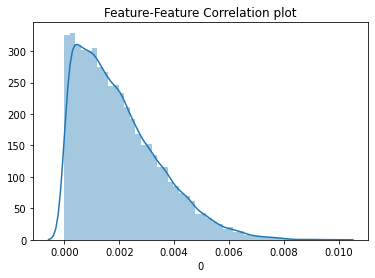

In [25]:
plt.title("Feature-Feature Correlation plot")
sns.distplot(d[0],kde=True)

######  Observations :
All Features have inter feature correlation value less than 0.02, Thus features are not correlated to each other.


######   

### 11. Feature-Target Correlation

In [26]:
col=['var_'+str(i) for i in range(0,200)]
col.append('target')
corr=train_data.loc[:,col].corr()
d=pd.DataFrame(corr.abs().unstack().sort_values(ascending=False).reset_index())
d=d[d.level_0!=d.level_1]
d=d[d.level_0=='target']
d

level_0  level_1         0
201    target   var_81  0.081642
204    target  var_139  0.074199
205    target   var_12  0.069573
207    target    var_6  0.066868
210    target   var_53  0.063411
...       ...      ...       ...
29735  target   var_38  0.000847
30391  target   var_17  0.000794
32750  target   var_27  0.000598
33042  target   var_30  0.000575
40163  target  var_185  0.000017

[200 rows x 3 columns]

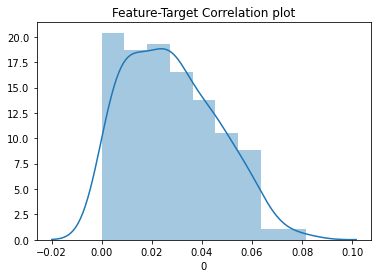

In [27]:
plt.title("Feature-Target Correlation plot")
sns.distplot(d[0],kde=True)

In [28]:
print('Top 10 most correlated variable:')
d.head(10)

Top 10 most correlated variable:


level_0  level_1         0
201  target   var_81  0.081642
204  target  var_139  0.074199
205  target   var_12  0.069573
207  target    var_6  0.066868
210  target   var_53  0.063411
212  target  var_110  0.063176
214  target   var_26  0.062412
215  target  var_174  0.061616
217  target   var_76  0.061187
220  target  var_146  0.060801

In [29]:
print('Top 10 least correlated variable:')
d.tail(10).sort_values(by=0,ascending=True)

Top 10 least correlated variable:


level_0  level_1         0
40163  target  var_185  0.000017
33042  target   var_30  0.000575
32750  target   var_27  0.000598
30391  target   var_17  0.000794
29735  target   var_38  0.000847
24466  target   var_41  0.001298
23411  target  var_126  0.001393
22589  target  var_103  0.001473
15489  target   var_10  0.002195
15111  target  var_100  0.002239

###### Observations :
10 Most Correlated Feature with Target: [ var_81, var_139, var_12, var_6, var_53, var_110, var_26, var_174, var_76, var_146].

10 Least Correlated Feature with Target: [ var_185, var_30, var_27, var_17, var_38, var_41, var_126, var_103, var_10, var_100]


######   

### 12. Feature Selection

Pearson Correlation & Significance Hypothesis Testing:
 
Lets assume Significance Level, SL is 0.05

Null Hypothesis:       Feature and Target doesnot have Linear Relationship : if calc_SL > assumed_SL

Alternate Hypothesis:  Feature and target have Linear Relationship : if calc_SL <= assumed_SL

In [30]:
col=['var_'+str(i) for i in range(0,200)]
col_reduced=[]
for i in col:
    corr,p_value = pearsonr(train_data[i],train_data["target"])
   
    if p_value > 0.05:
        col_reduced.append(i)
        print("For Column: ",i)
        print("Correlation value: ",corr,"   P Value: ",p_value)
        print("Null Hypothesis Passed. ",i," and Target doesnot have Linear Relationship\n\n")       

For Column:  var_7
Correlation value:  -0.003050112916041119    P Value:  0.17255289636778084
Null Hypothesis Passed.  var_7  and Target doesnot have Linear Relationship


For Column:  var_10
Correlation value:  -0.0021954170440392127    P Value:  0.3261908018641099
Null Hypothesis Passed.  var_10  and Target doesnot have Linear Relationship


For Column:  var_17
Correlation value:  0.0007944053985665725    P Value:  0.7223897779063667
Null Hypothesis Passed.  var_17  and Target doesnot have Linear Relationship


For Column:  var_27
Correlation value:  -0.0005980105902311731    P Value:  0.7891328548824625
Null Hypothesis Passed.  var_27  and Target doesnot have Linear Relationship


For Column:  var_30
Correlation value:  0.0005747252097658824    P Value:  0.7971607543066119
Null Hypothesis Passed.  var_30  and Target doesnot have Linear Relationship


For Column:  var_38
Correlation value:  0.0008473232437213995    P Value:  0.7047382318736541
Null Hypothesis Passed.  var_38  and Tar

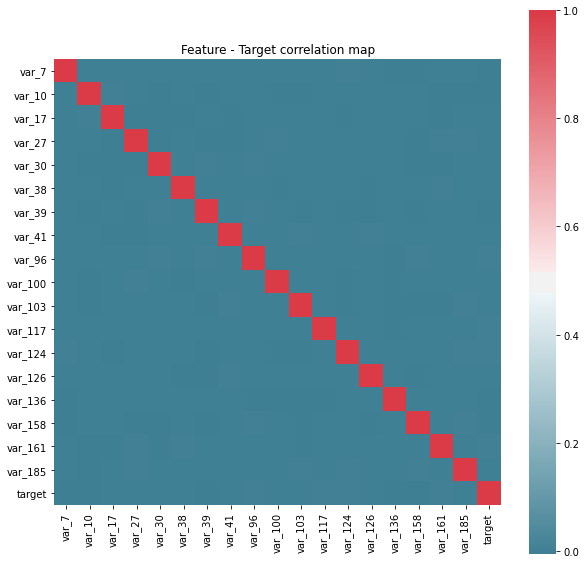

In [31]:
col=col_reduced.copy()
col.append('target')
corr=train_data.loc[:,col].corr()
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature - Target correlation map')
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

###### Feature variable ['var_7', 'var_10', 'var_17', 'var_27', 'var_30', 'var_38', 'var_39', 'var_41', 'var_96', 'var_98', 'var_100', 'var_103', 'var_117', 
###### 'var_126', 'var_136', 'var_158', 'var_161', 'var_185']  shows zero correlation with the target variable. Thus dropping these feature.

In [32]:
train_data.drop(columns=col_reduced,inplace=True)
test_data.drop(columns=col_reduced,inplace=True)

In [33]:
train_data.shape

(200000, 183)

######   

### 13. Feature Scaling

#### Standarization

In [34]:
scaler=StandardScaler()
scaler.fit(train_data.drop(columns='target').values)

StandardScaler()

In [35]:
num_cols=train_data.drop(columns='target').columns

In [36]:
train_data[num_cols]=scaler.transform(train_data.drop(columns='target'))
test_data[num_cols]=scaler.transform(test_data.drop(columns='ID_code'))

In [37]:
print('Train Data after Standardization:')
train_data.head()

Train Data after Standardization:


target     var_0     var_1     var_2     var_3     var_4     var_5  \
0       0 -0.578232 -1.274019  0.452533 -0.834318  0.235040 -0.536552   
1       0  0.270735 -0.622323  1.191961 -0.689377  0.791456  1.539999   
2       0 -0.682477 -0.276201  0.517883  0.536644 -0.306996 -0.511153   
3       0  0.125608 -0.129539 -0.667924  0.195299  0.928723  0.410651   
4       0 -0.277759  0.035521  0.818892 -0.078032  0.738993  0.955611   

      var_6     var_8     var_9  ...   var_190   var_191   var_192   var_193  \
0 -0.335609 -1.561692 -1.473796  ...  0.262818 -1.150514  0.835729 -0.418764   
1  0.245257  0.858986  0.419300  ...  0.968746  0.094396  0.455383  1.925494   
2  1.774526 -1.561482 -1.307408  ... -0.073933  0.779971 -0.173114 -0.420081   
3  0.502082 -1.844037  0.548767  ...  0.269686 -0.892367 -0.828656 -0.487012   
4  0.615109  1.794813  0.090006  ... -1.041720  0.690807 -1.426392  1.480620   

    var_194   var_195   var_196   var_197   var_198   var_199  
0  0.168744 -1.584278  1.022131 -0.373933 -1.028126  0.213925  
1 -0.817603  1.525327  1.067654 -0.129074  0.827492  0.505624  
2  1.151678  2.302641 -1.617906 -0.695487 -0.381853  0.356544  
3  1.607978 -0.793352 -0.959020  1.504005  0.698930 -0.544097  
4 -1.501143 -0.962806  0.297627  0.646782  0.708149 -0.525962  

[5 rows x 183 columns]

######   

## Train, Validation Data Split

In [38]:
def split_data(data):
    x_train, x_test, y_train, y_test= train_test_split(data.drop(columns='target'),data.target,test_size=0.2,random_state=1,stratify=data.target)
    return x_train, x_test, y_train, y_test

In [39]:
x_train, x_test, y_train, y_test=split_data(train_data)

In [40]:
x_train.shape

(160000, 182)

In [41]:
x_test.shape

(40000, 182)

In [42]:
y_train.shape

(160000,)

In [43]:
y_test.shape

(40000,)

######   

## Modelling with selected features & standardized data

In [44]:
LR_model,RF_model, DT_model, NB_model=modelling(x_train, x_test, y_train, y_test)


Logistic Regression Modelling

ROC_AUC Score:  0.63
Precision Score:  0.68
Recall Score:  0.27 


Decision Tree Classifier Modelling

ROC_AUC Score:  0.55
Precision Score:  0.19
Recall Score:  0.2 


Random Forest Classifier Modelling

ROC_AUC Score:  0.51
Precision Score:  0.58
Recall Score:  0.02 


Naive Bayes Modelling

ROC_AUC Score:  0.67
Precision Score:  0.71
Recall Score:  0.36 



###### Observations :
On the basis of Precision, Recall & ROC_AUC score, the best performing model is Naive Bayes model.

ROC_AUC Score:  0.67

Precision Score:  0.71

Recall Score:  0.36 

###### The Precision & ROC_AUC score are quite average & Recall score is quite low, which means there is High False Negative Rate

#### Since the data contains imbalanced target class, we are getting high false negative rate in our predictions. The above algorithms designed in a way that they favours the majority class in predictions. So to improve the predictions scores we have to deal with imbalanced situation.

##### Trying two approaches to improve the results.

1. Sampling Techniques. [ Over Sampling, Under Sampling, SMOTE Sampling]
2. Lightgbm Algorithm.

######   

##   Treating Imbalanced Dataset

### 1. Sampling techniques

In [45]:
transaction=train_data[train_data['target']==1]
no_transaction=train_data[train_data['target']==0]

#### i. Over Sampling the lower class

In [46]:
transaction_oversampled = resample(transaction,
                          replace=True, # sample with replacement
                          n_samples=len(no_transaction), # match number in majority class
                          random_state=27) # reproducible results

oversampled=pd.concat([transaction_oversampled,no_transaction])
oversampled.target.value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [47]:
x_train, x_test, y_train, y_test=split_data(oversampled)

In [48]:
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
roc_auc,precision,recall=acc_metrics(y_test,NB_model.predict(x_test))


ROC_AUC Score:  0.81
Precision Score:  0.81
Recall Score:  0.8 



#### ii. Under Sampling the higher class

In [49]:
transaction_undersampled = resample(no_transaction,
                          replace=True, # sample with replacement
                          n_samples=len(transaction), # match number in majority class
                          random_state=27) # reproducible results

undersampled=pd.concat([transaction_undersampled,transaction])
undersampled.target.value_counts()

1    20098
0    20098
Name: target, dtype: int64

In [50]:
x_train, x_test, y_train, y_test=split_data(undersampled)

In [51]:
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
roc_auc,precision,recall=acc_metrics(y_test,NB_model.predict(x_test))


ROC_AUC Score:  0.8
Precision Score:  0.8
Recall Score:  0.79 



#### iii. SMOTE Samplimg

In [52]:
x_train, x_test, y_train, y_test=split_data(train_data)

In [53]:
sm = SMOTE(random_state=1)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [54]:
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
roc_auc,precision,recall=acc_metrics(y_test,NB_model.predict(x_test))


ROC_AUC Score:  0.53
Precision Score:  0.19
Recall Score:  0.12 



###### Observations :
Over Sampling & Under Sampling performs equally, while SMOTE performs poorly. Selecting Over sampling with Naive Bayes Model for further processes

In [55]:
x_train, x_test, y_train, y_test=split_data(oversampled)

In [56]:
NB_model=GaussianNB()
NB_model.fit(x_train,y_train)
roc_auc,precision,recall=acc_metrics(y_test,NB_model.predict(x_test))


ROC_AUC Score:  0.81
Precision Score:  0.81
Recall Score:  0.8 



##### Naive Bayes Result:
    ROC_AUC Score:  0.81
    Precision Score:  0.81
    Recall Score:  0.8 

### 2. Lightgbm

In [57]:
param = {
    'bagging_freq': 5,  'bagging_fraction': 0.5,  'boost_from_average':False,   
    'boost': 'gbdt',    'feature_fraction': 0.08, 'learning_rate': 0.01,
    'max_depth': -1,    'metric':'auc',             'min_data_in_leaf': 80,     
    'min_sum_hessian_in_leaf': 10.0,'num_leaves': 50,  'num_threads': 20,            
    'tree_learner': 'serial',   'objective': 'binary',       'verbosity': 1,
    'max_bin': 100, 'subsample_for_bin': 100, 'subsample': 1,
    'subsample_freq': 1, 'colsample_bytree': 0.8, 'min_split_gain': 0.45, 
    'min_child_weight': 1, 'min_child_samples': 5, 'is_unbalance':True,
}

In [58]:
training_data = lgb.Dataset(x_train, label=y_train)
validation_data = lgb.Dataset(x_test, label=y_test)

lgb_model=lgb.train(params=param,train_set=training_data,num_boost_round=10000,valid_sets=validation_data,verbose_eval=1000, early_stopping_rounds = 5000)

Training until validation scores don't improve for 5000 rounds
[1000]	valid_0's auc: 0.924962
[2000]	valid_0's auc: 0.941803
[3000]	valid_0's auc: 0.954074
[4000]	valid_0's auc: 0.963392
[5000]	valid_0's auc: 0.970599
[6000]	valid_0's auc: 0.976245
[7000]	valid_0's auc: 0.980627
[8000]	valid_0's auc: 0.984141
[9000]	valid_0's auc: 0.986872
[10000]	valid_0's auc: 0.98911
Did not meet early stopping. Best iteration is:
[10000]	valid_0's auc: 0.98911


In [59]:
y_pred=lgb_model.predict(x_test)


In [60]:
roc_auc_score(y_test,y_pred)

0.9891099355615375

In [61]:
pred=np.where(y_pred>=0.5,1,0)
acc_metrics(y_test,pred)


ROC_AUC Score:  0.95
Precision Score:  0.93
Recall Score:  0.98 



(0.95, 0.93, 0.98)

##### Lightgbm Result:
    ROC_AUC Score:  0.95
    Precision Score:  0.93
    Recall Score:  0.98

###### Observations :
On the basis of Precision, Recall & ROC_AUC Score, the best performing model is Lightgbm model.

######   

## Dumping Models

In [62]:
pickle.dump(lgb_model,open('Santander_Prediction_model.model','wb'))
pickle.dump(col_reduced,open('columns_to_drop.list','wb'))
pickle.dump(scaler,open('scaler.model','wb'))

######   

## Conclusion
This was a classification problem on a typically unbalanced dataset with no missing values.
Predictor variables are anonymous and numeric and target variable is categorical. Visualising
descriptive features and finally I got to know that these variables are not correlated among
themselves. After that I decided to treat imbalanced dataset and built different models with original
data and chosen LightGBM as my final model with final value of AUC-Score is 0.95.

######   

## Test.csv prediction

In [63]:
# Importing Models

model=pickle.load(open('Santander_Prediction_model.model','rb'))
scaler=pickle.load(open('scaler.model','rb'))
columns_to_drop=pickle.load(open('columns_to_drop.list','rb'))

In [64]:
# Importing Dataset

test_data=pd.read_csv('test.csv')

In [65]:
# Dropping Columns

test_data.drop(columns=columns_to_drop,inplace=True,axis=1)

In [66]:
# Scaling the data

num_cols=test_data.drop(columns='ID_code').columns
test_data[num_cols]=scaler.transform(test_data.drop(columns='ID_code'))

In [67]:
# Predicting

pred=model.predict(test_data.drop(columns='ID_code'))
pred=np.where(pred>=0.5,1,0)

In [68]:
#Structuring data

test_data['target']=pred
test_data=test_data[['ID_code','target']]

In [69]:
# Submitting result in csv file

test_data.to_csv('predictions.csv',index=False)